In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [57]:
# Load the CSV file
df = pd.read_csv("tweets_dates.csv")

df.sort_values('date', inplace=True)
# Convert the date column to `datetime` in Pandas
df['date'] = pd.to_datetime(df['date'])
df

,date,count,file
0,2007-04-01,1,Datasets/archive (1)/tweets.csv
1,2009-01-01,4,Datasets/archive (1)/tweets.csv
2,2009-02-01,1,Datasets/archive (1)/tweets.csv
3,2009-06-01,5,Datasets/archive (1)/tweets.csv
4,2009-09-01,1,Datasets/archive (1)/tweets.csv
...,...,...,...
245,2023-02-01,5384,Datasets/archive (7)/tweets.csv
246,2023-03-01,6162,Datasets/archive (7)/tweets.csv
247,2023-04-01,5298,Datasets/archive (7)/tweets.csv
248,2023-05-01,5496,Datasets/archive (7)/tweets.csv


In [58]:
total_count = df['count'].sum()
print("Total count:", total_count)

Total count: 76178808


In [59]:
dataset_map = {
    'Datasets/archive (1)/tweets.csv': 'Dataset 1',
    'Datasets/archive (10)/bitcoin-tweets-2021.csv': 'Dataset 2',
    'Datasets/archive (10)/bitcoin-tweets-2022.csv': 'Dataset 2',
    'Datasets/archive (3)/bitcoin_tweets.csv': 'Dataset 3',
    'Datasets/archive/Bitcoin_tweets.csv': 'Dataset 4',
    'Datasets/archive (6)/df_Final.csv': 'Dataset 5',
    'Datasets/archive (7)/tweets.csv': 'Dataset 6',
    'Datasets/archive (8)/BitcoinTweets.csv': 'Dataset 7',
    'Datasets/archive (2)/cleanprep.csv': 'Dataset 8',
    'Datasets/archive (14)/unbalanced_twitter_btc_big.csv': 'Dataset 9',
    'Datasets/archive (5)/mbsa.csv': 'Dataset 10'
}


In [60]:
df['file'] = df['file'].map(dataset_map)
df = df[df['file'] != 'Dataset 10']
# Group by date and dataset name and sum the counts
df_grouped = df.groupby(['date', 'file'], as_index=False)['count'].sum()

In [61]:
df_grouped.file.unique()

array(['Dataset 1', 'Dataset 7', 'Dataset 5', 'Dataset 8', 'Dataset 2',
       'Dataset 4', 'Dataset 9', 'Dataset 6', 'Dataset 3'], dtype=object)

In [65]:
# Pivot the data to prepare for plotting
pivot_df = df_grouped.pivot(index='date', columns='file', values='count').fillna(0)

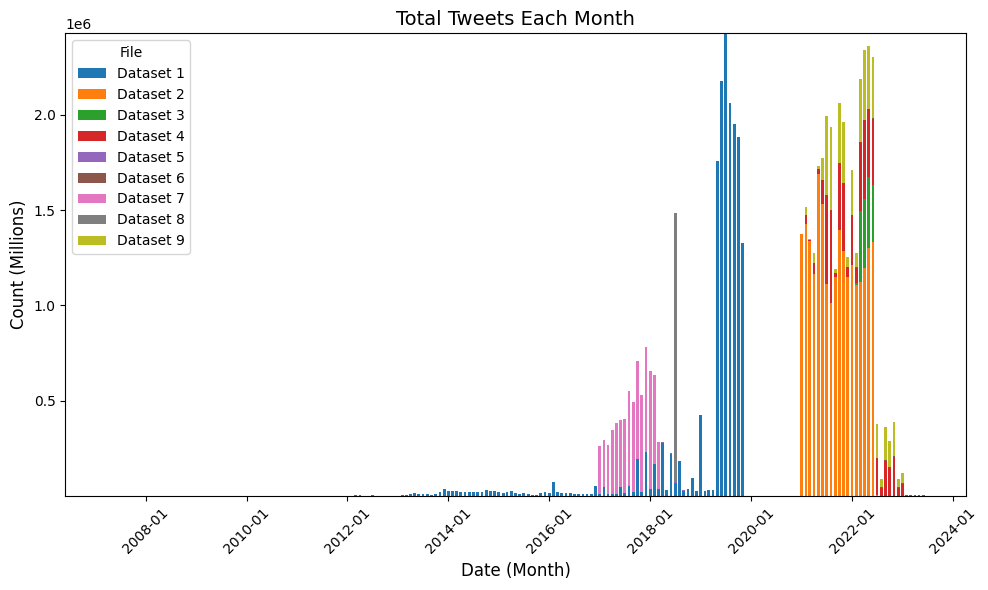

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re

# Extract sorted file order based on number
def extract_number(label):
    match = re.search(r'\d+', label)
    return int(match.group()) if match else float('inf')

# Get sorted file tags
sorted_file_tags = sorted(pivot_df.columns, key=extract_number)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None

# Plot in sorted order
for file_tag in sorted_file_tags:
    ax.bar(
        pivot_df.index,
        pivot_df[file_tag],
        label=file_tag,
        bottom=bottom,
        width=20
    )
    bottom = pivot_df[file_tag] if bottom is None else bottom + pivot_df[file_tag]

# Format x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.set_title('Total Tweets Each Month', fontsize=14)
ax.set_xlabel('Date (Month)', fontsize=12)
ax.set_ylabel('Count (Millions)', fontsize=12)

# Add sorted legend
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: extract_number(x[0]))
sorted_labels, sorted_handles = zip(*sorted_handles_labels)
ax.legend(sorted_handles, sorted_labels, title='File')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Plot the data with Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(pivot_df["month"], pivot_df["count"], width=20, color='skyblue')
# Format the x-axis with Matplotlib's mdates
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as 'YYYY-MM'

plt.xlabel("Date")
plt.ylabel("Occurrences")
plt.yscale("log")
plt.title("Occurrences for Each Date")
plt.xticks(rotation=45)

# I should do something first to find january (and I'm lazy now and it isn't so relevant)
# plt.set_xticklabels([date[:4] for date in pandas_df["date"][::12]])  # Format as the first 4 characters

plt.tight_layout()
plt.show()